In [1]:
import xml.etree.ElementTree as et

In [2]:
tree = et.parse('san_francisco.osm.xml')
root = tree.getroot()

In [3]:
len(root)

2018129

In [4]:
len(root.findall('node'))

1819573

In [5]:
len(root.findall('way'))

195259

In [6]:
len(root.findall('relation'))

3294

In [7]:
len(root.findall('bounds'))

1

In [8]:
# Create dictionary of all nodes in the map (by id)

nodes = {}
for node in root.findall('node'):
    id = node.get('id')
    lat = float(node.get('lat'))
    lon = float(node.get('lon'))
    nodes[id] = (lat, lon)

In [9]:
streets = []
for way in root.findall('way'):
    for tag in way.findall('tag'):
        if tag.get('k') == 'highway':
            line = []
            for nd in way.findall('nd'):
                coords = nodes[nd.get('ref')]
                line.append(coords)
            
            speedlimit = 50.0  # Default speed limit if no speed limit is provided by OSM
            for tag in way.findall('tag'):
                if tag.get('k') == 'maxspeed':
                    tag_string = tag.get('v').split(';')[0]
                    try:
                        speedlimit = int(tag_string)
                    except ValueError:
                        if tag_string.endswith('mph'):
                            speedlimit = 1.609 * int(tag_string[:-4])
    
            streets.append({'speedlimit': speedlimit, 'line': line})

In [10]:
len(streets)

24870

In [11]:
streets[3]['speedlimit']

50.0

In [12]:
streets[3]['line']

[(37.7742804, -122.4001293),
 (37.7748305, -122.3994256),
 (37.775495, -122.3985843),
 (37.7759585, -122.3979976),
 (37.7774575, -122.3960998),
 (37.7777178, -122.3957703)]

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

UsageError: Line magic function `%` not found.


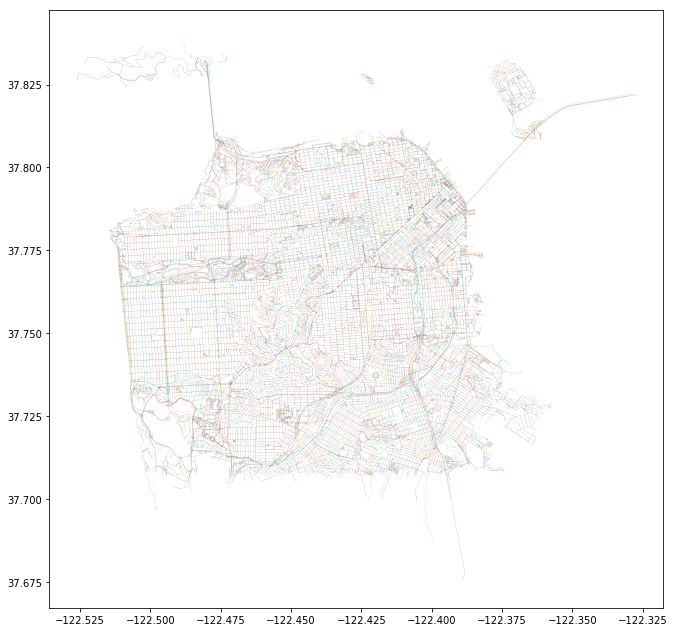

In [17]:
plt.figure(figsize = (11, 11))

for street in streets:
    lats = []
    lons = []
    for (x, y) in street['line']:
        lats.append(x)
        lons.append(y)
    
    plt.plot(lons, lats, linewidth=0.15, markersize=0.35)

In [14]:
#import pickle

#with open('streets_san_francsisco.pkl', 'wb') as file:
    #pickle.dump(streets, file)